In [1]:
#import tensorflow and other libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from tensorflow.keras import layers, models, optimizers 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import  Model


In [2]:
#load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

#reshape the data
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


4422102/4422102 [==============================] - 1s 0us/step


In [3]:
#define Autoencoder
class Autoencoder(Model):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoding_dim = encoding_dim   
        self.encoder = tf.keras.Sequential([
        layers.Dense(encoding_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
        layers.Dense(784, activation='sigmoid'),
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

shape = x_test.shape[1]
encoding_dim = 32
autoencoder = Autoencoder(encoding_dim)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3282 - val_loss: 0.2969
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2898 - val_loss: 0.2889
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2855 - val_loss: 0.2867
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2841 - val_loss: 0.2858
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - val_loss: 0.2853
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2829 - val_loss: 0.2851
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2826 - val_loss: 0.2848
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2824 - val_loss: 0.2847
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2822 - val_loss: 0.2848
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.282

In [4]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

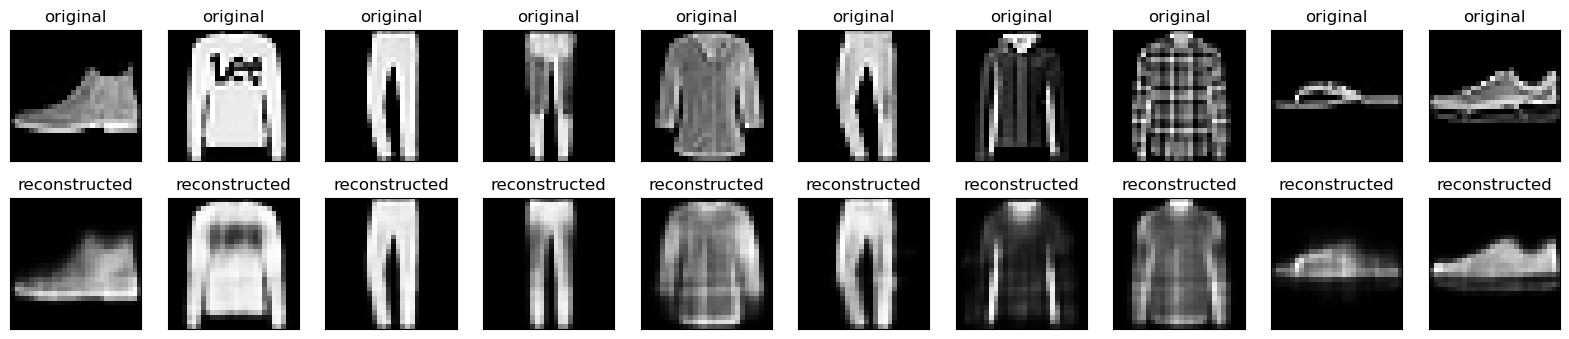

In [5]:
#plot the reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [9]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [10]:
#image denoising
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

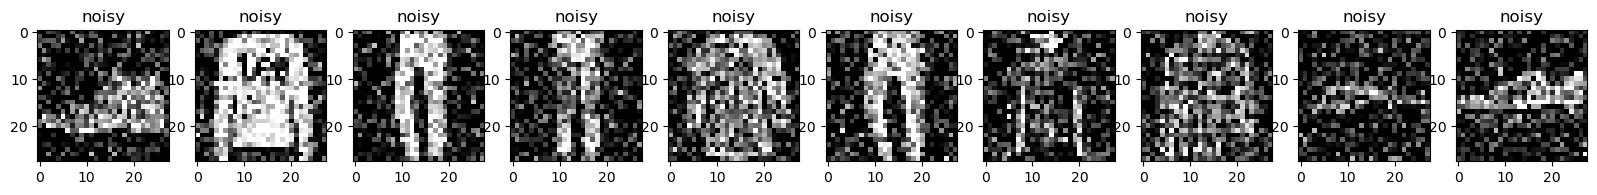

In [11]:
#plot the noisy images
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.title("noisy")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()


In [12]:
#define convolutional autoencoder
class ConvAutoencoder(Model):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
        layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
        self.decoder = tf.keras.Sequential([
        layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
conv_autoencoder = ConvAutoencoder()
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3068 - val_loss: 0.2896
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2847 - val_loss: 0.2856
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2826 - val_loss: 0.2841
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2814 - val_loss: 0.2830
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2805 - val_loss: 0.2822
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2797 - val_loss: 0.2818
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2793 - val_loss: 0.2811
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2789 - val_loss: 0.2808
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2787 - val_loss: 0.2808
Epoch 10/10
1875/1875 [==============================] - 33s 18m

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32)                25120     
                                                                 
 sequential_1 (Sequential)   (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "conv_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 7, 7, 8)           1320      
                                                                 
 sequential_3 (Sequential)   (None, 28, 28, 1)         1897      
                                                         

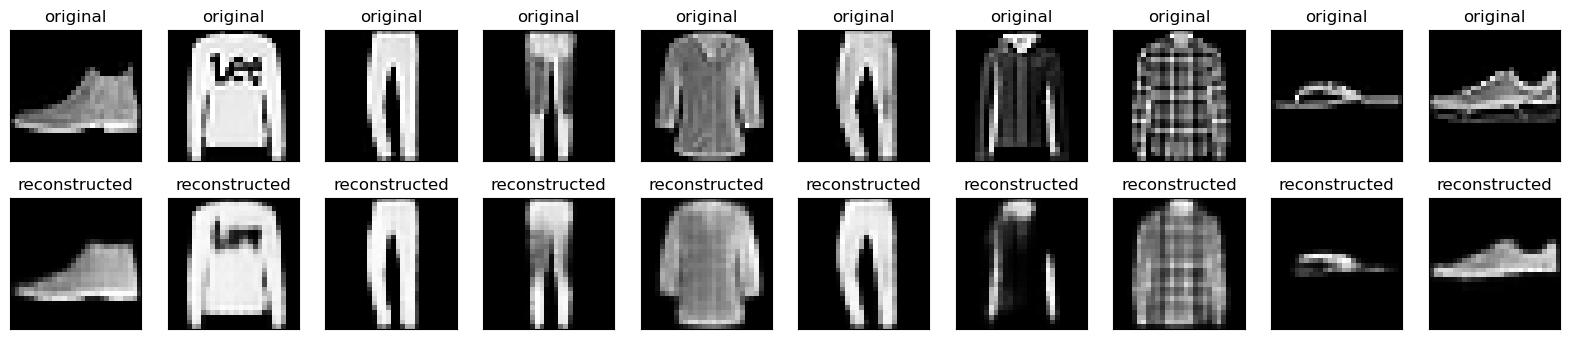

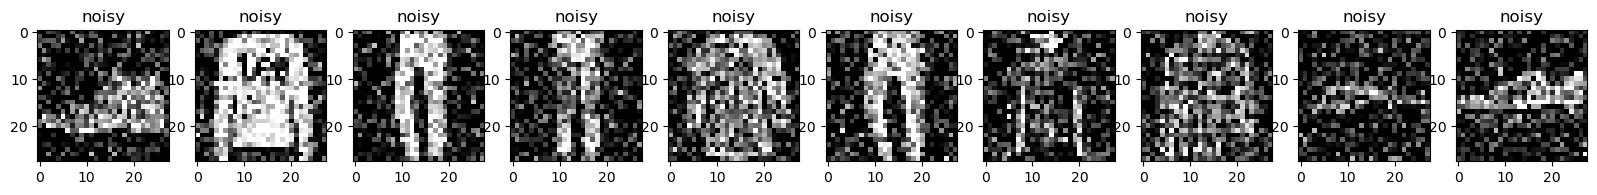

In [13]:
autoencoder.summary()
conv_autoencoder.summary()

#plot the reconstructed images
encoded_imgs = conv_autoencoder.encoder(x_test).numpy()
decoded_imgs = conv_autoencoder.decoder(encoded_imgs).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(tf.squeeze(x_test[i]))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#plot the noisy images
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.title("noisy")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

